1. Load the image dog.jpg and compute the economy SVD. Compute the
relative reconstruction error of the truncated SVD in the Frobenius norm
as a function of the rank r. Square this error to compute the fraction
of missing variance as a function of r. You may also decide to plot 1
minus the error or missing variance to visualize the amount of norm or
variance captured at a given rank r. Plot these quantities along with the
cumulative sum of singular values as a function of r. Find the rank r where
the reconstruction captures 99% of the total variance. Compare this with
the rank r where the reconstruction captures 99% in the Frobenius norm
and with the rank r that captures 99% of the cumulative sum of singular
values.



Componentes para 99% de varianza total: 15
Componentes para 99% de norma Frobenius: 15
Componentes para 99% de suma acumulada: 561


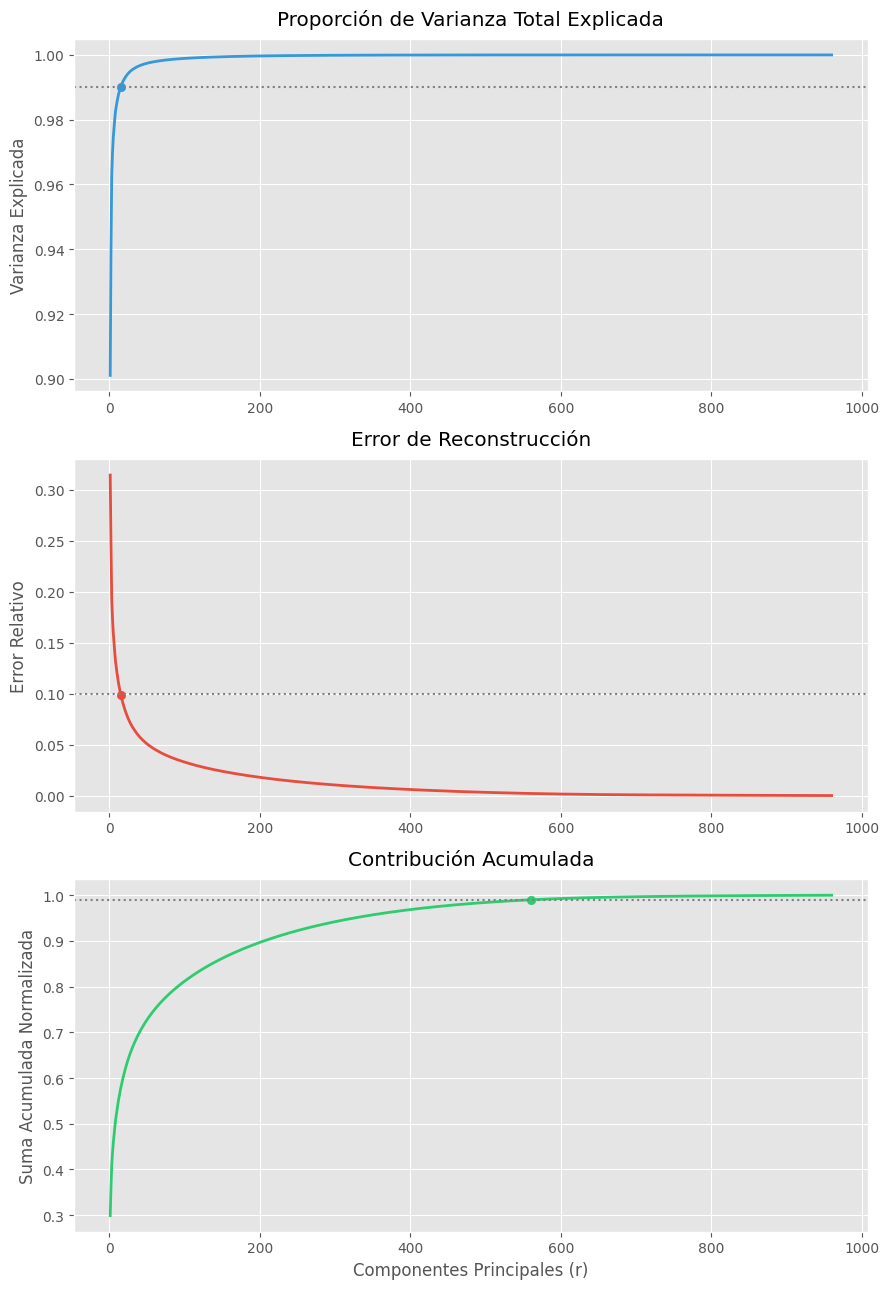

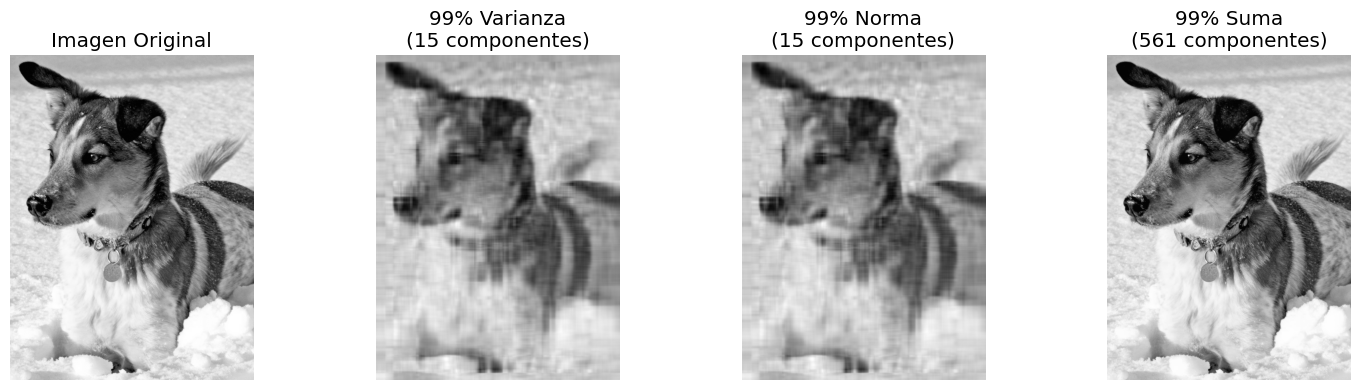

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

def load_and_prepare_image(image_path):
    img_array = imread(image_path)
    return np.mean(img_array, axis=2)

def compute_svd(matrix):
    return np.linalg.svd(matrix, full_matrices=False)

def calculate_metrics(singular_values):
    total_norm = np.sum(singular_values**2)
    cumulative_sum = np.cumsum(singular_values)
    explained_variance = np.cumsum(singular_values**2) / total_norm
    relative_error = np.sqrt(1 - explained_variance)

    return {
        'total_norm': total_norm,
        'cumulative_sum': cumulative_sum,
        'explained_variance': explained_variance,
        'relative_error': relative_error
    }

def find_threshold_indices(metrics, threshold=0.99):
    var_idx = np.argmax(metrics['explained_variance'] >= threshold) + 1
    norm_idx = np.argmax(1 - metrics['relative_error']**2 >= threshold) + 1
    sum_idx = np.argmax(metrics['cumulative_sum'] >= threshold * metrics['cumulative_sum'][-1]) + 1

    return var_idx, norm_idx, sum_idx

def plot_analysis_results(singular_values, metrics, thresholds):
    plt.style.use('ggplot')
    color_palette = ['#3498db', '#e74c3c', '#2ecc71']
    rank_values = np.arange(1, len(singular_values)+1)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 13))

    # Gráfico de varianza explicada
    ax1.plot(rank_values, metrics['explained_variance'],
             color=color_palette[0], linewidth=2)
    ax1.axhline(0.99, linestyle=':', color='gray')
    ax1.scatter([thresholds[0]], [metrics['explained_variance'][thresholds[0]-1]],
                color=color_palette[0])
    ax1.set_ylabel('Varianza Explicada')
    ax1.set_title('Proporción de Varianza Total Explicada', pad=10)

    # Gráfico de error relativo
    ax2.plot(rank_values, metrics['relative_error'],
             color=color_palette[1], linewidth=2)
    ax2.axhline(np.sqrt(0.01), linestyle=':', color='gray')
    ax2.scatter([thresholds[1]], [metrics['relative_error'][thresholds[1]-1]],
                color=color_palette[1])
    ax2.set_ylabel('Error Relativo')
    ax2.set_title('Error de Reconstrucción', pad=10)

    # Gráfico de suma acumulada
    ax3.plot(rank_values, metrics['cumulative_sum']/metrics['cumulative_sum'][-1],
             color=color_palette[2], linewidth=2)
    ax3.axhline(0.99, linestyle=':', color='gray')
    ax3.scatter([thresholds[2]],
                [metrics['cumulative_sum'][thresholds[2]-1]/metrics['cumulative_sum'][-1]],
                color=color_palette[2])
    ax3.set_xlabel('Componentes Principales (r)')
    ax3.set_ylabel('Suma Acumulada Normalizada')
    ax3.set_title('Contribución Acumulada', pad=10)

    plt.tight_layout()
    return fig

def reconstruct_image(U, s, Vt, components):
    return U[:, :components] @ np.diag(s[:components]) @ Vt[:components, :]

def display_reconstructions(original, reconstructions):
    fig, axes = plt.subplots(1, len(reconstructions)+1, figsize=(15, 4))

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Imagen Original')

    for idx, (title, reconstructed) in enumerate(reconstructions.items(), 1):
        axes[idx].imshow(reconstructed, cmap='gray')
        axes[idx].set_title(title)

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    return fig

# Procesamiento principal
if __name__ == "__main__":
    # Cargar y preparar datos
    gray_image = load_and_prepare_image('/content/dog.jpg')

    # Realizar SVD
    left_vectors, singular_values, right_vectors = compute_svd(gray_image)

    # Calcular métricas
    analysis_metrics = calculate_metrics(singular_values)

    # Determinar puntos de corte
    var_r, norm_r, sum_r = find_threshold_indices(analysis_metrics)
    print(f"Componentes para 99% de varianza total: {var_r}")
    print(f"Componentes para 99% de norma Frobenius: {norm_r}")
    print(f"Componentes para 99% de suma acumulada: {sum_r}")

    # Visualizar análisis
    plot_analysis_results(singular_values, analysis_metrics, (var_r, norm_r, sum_r))

    # Crear reconstrucciones comparativas
    reconstruction_titles = {
        f'99% Varianza\n({var_r} componentes)': var_r,
        f'99% Norma\n({norm_r} componentes)': norm_r,
        f'99% Suma\n({sum_r} componentes)': sum_r
    }

    reconstructed_images = {
        title: reconstruct_image(left_vectors, singular_values, right_vectors, components)
        for title, components in reconstruction_titles.items()
    }

    # Mostrar resultados
    display_reconstructions(gray_image, reconstructed_images)
    plt.show()

2. Generate a random 100$\times$100 matrix, i.e., a matrix whose entries are sam-
pled from a normal distribution. Compute the SVD of this matrix and plot the singular values. Repeat this 100 times and plot the distribution
of singular values in a box-and-whisker plot. Plot the mean and median
singular values as a function of r. Now repeat this for different matrix
sizes (e.g., 50$\times$50, 200$\times$200, 500$\times$500)

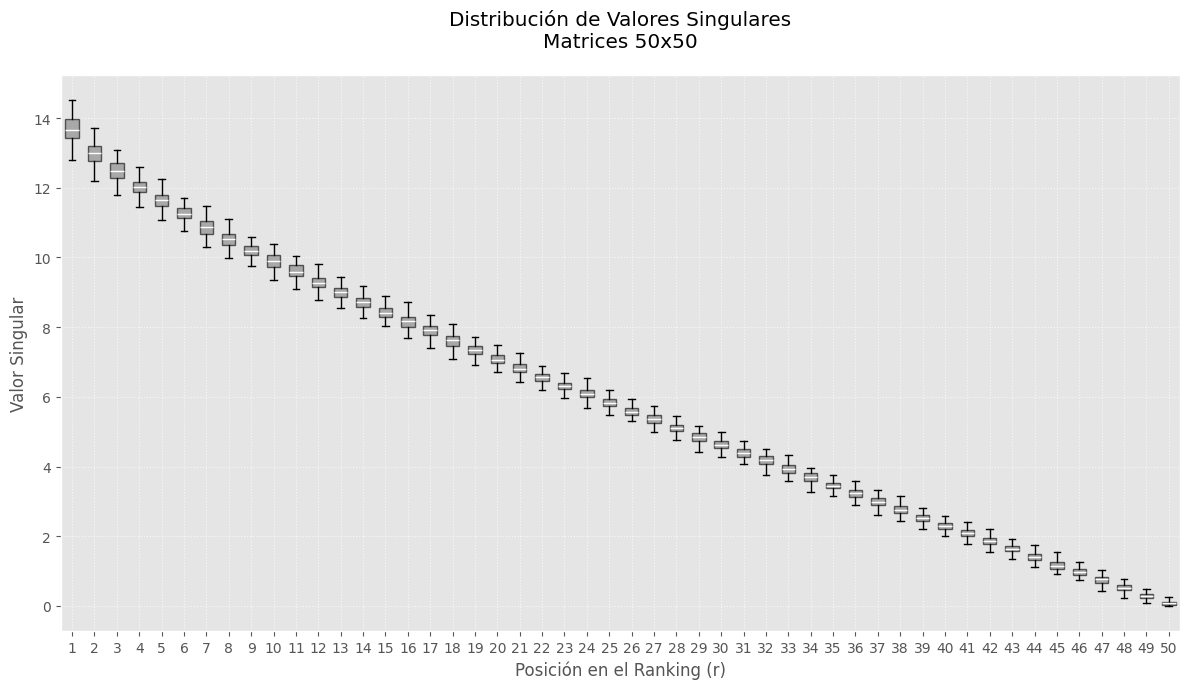

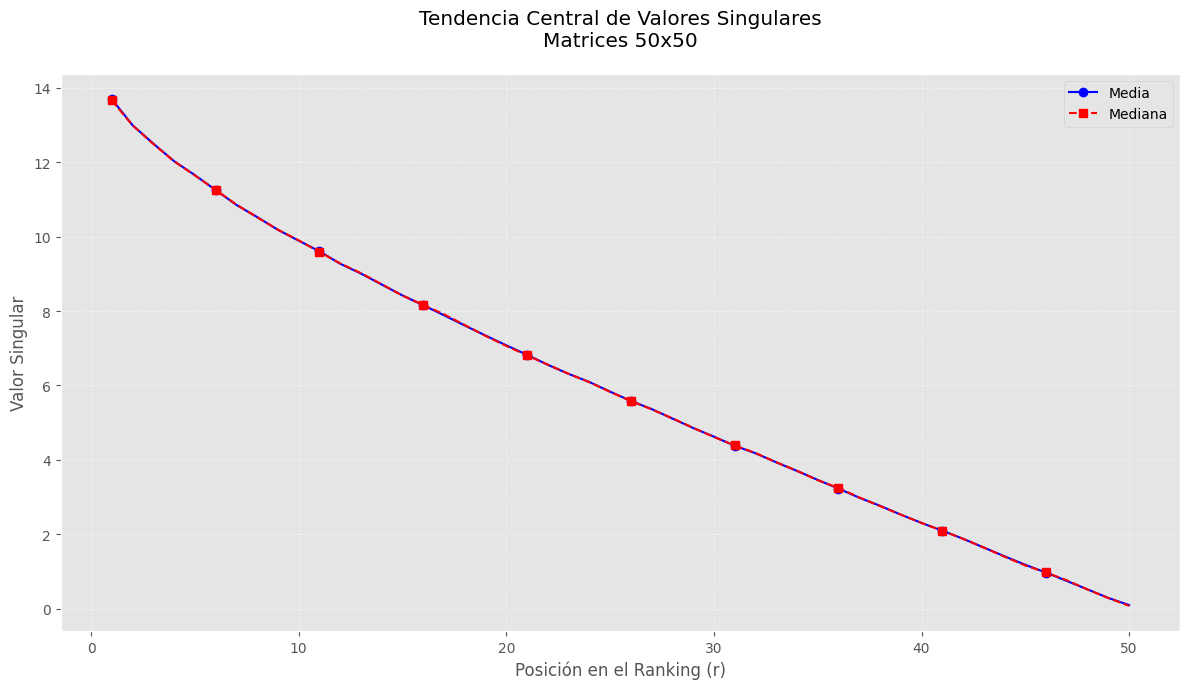

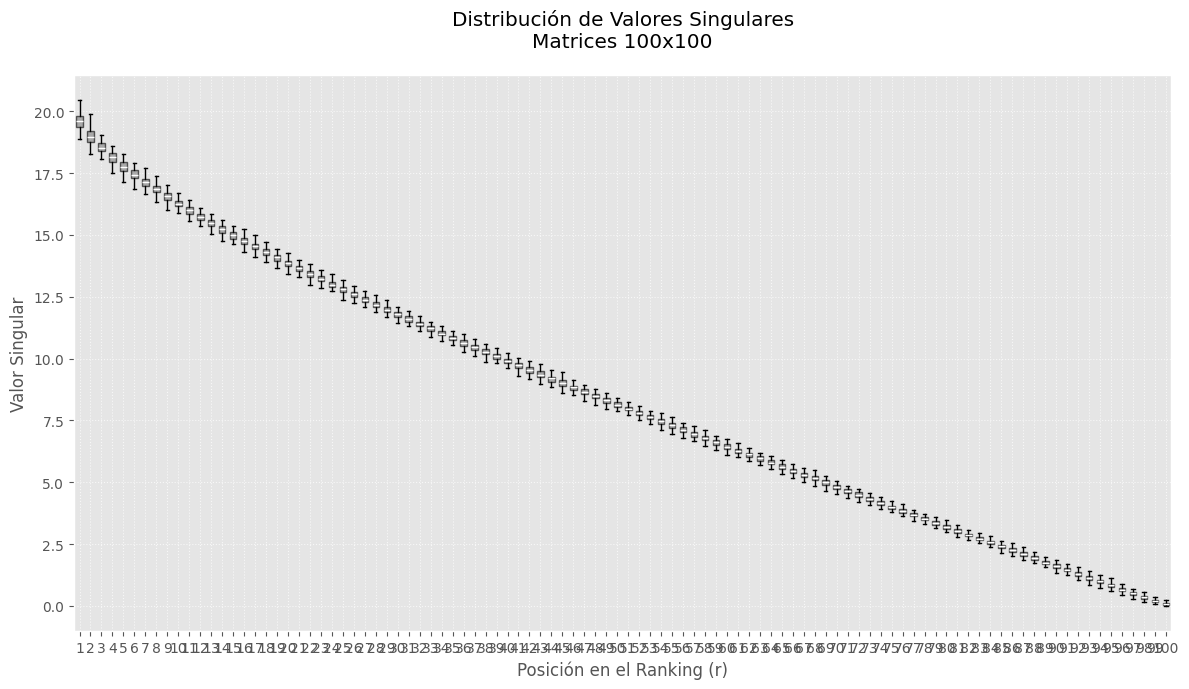

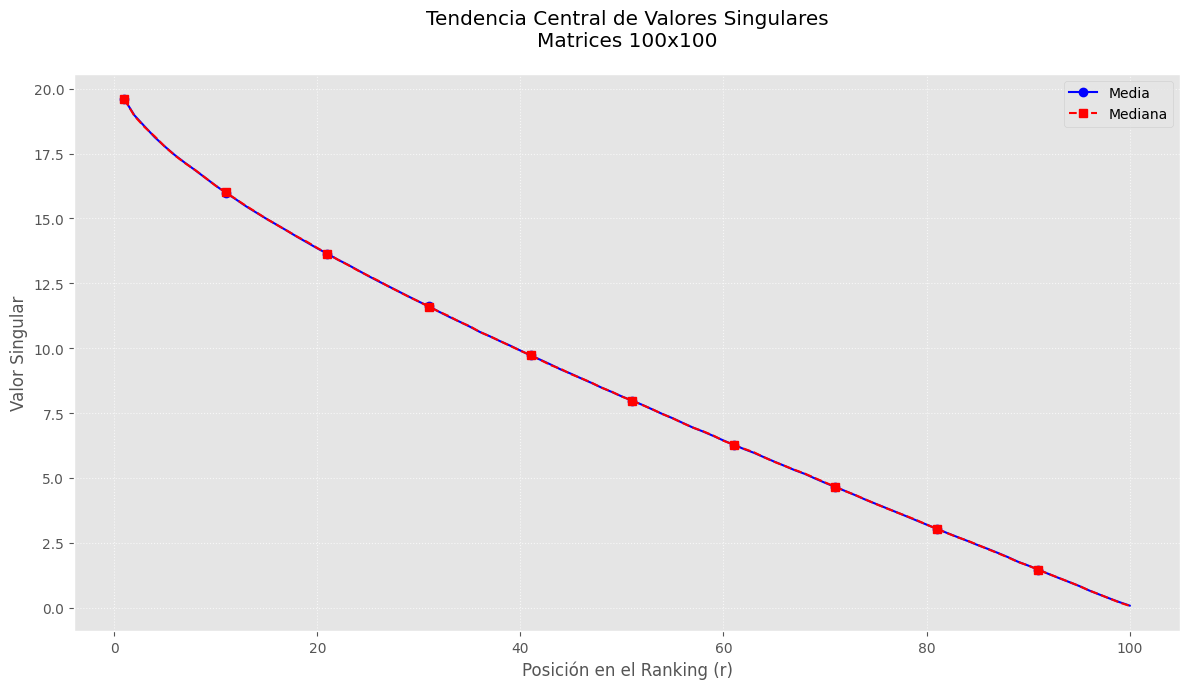

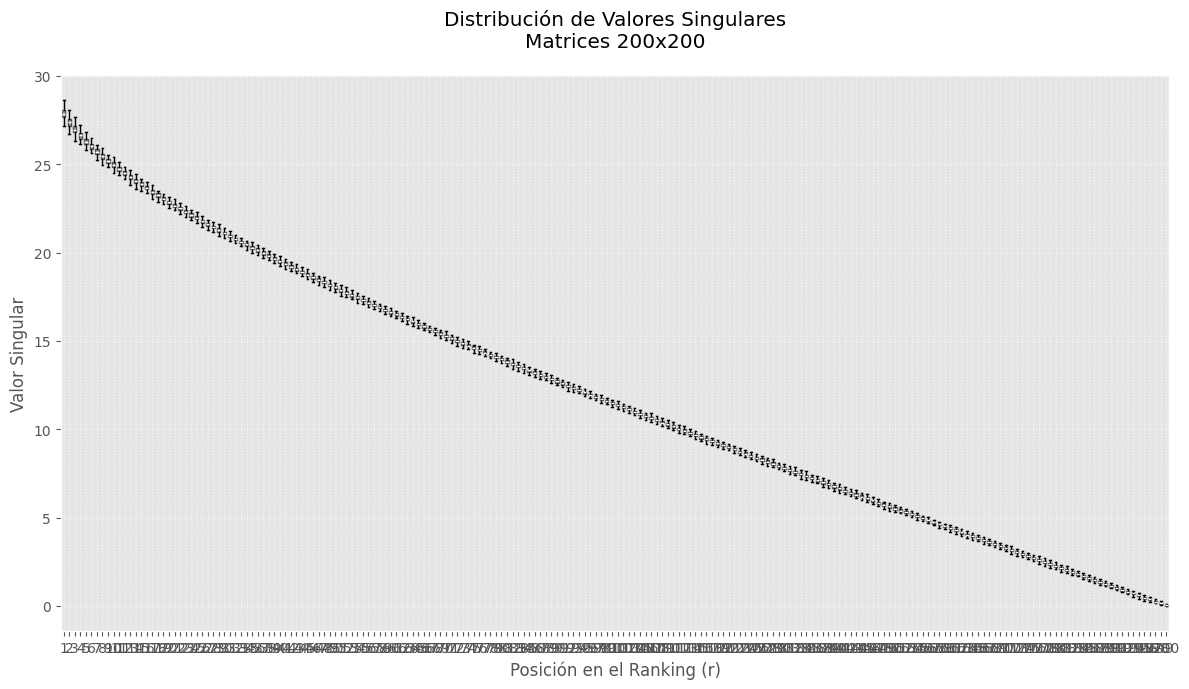

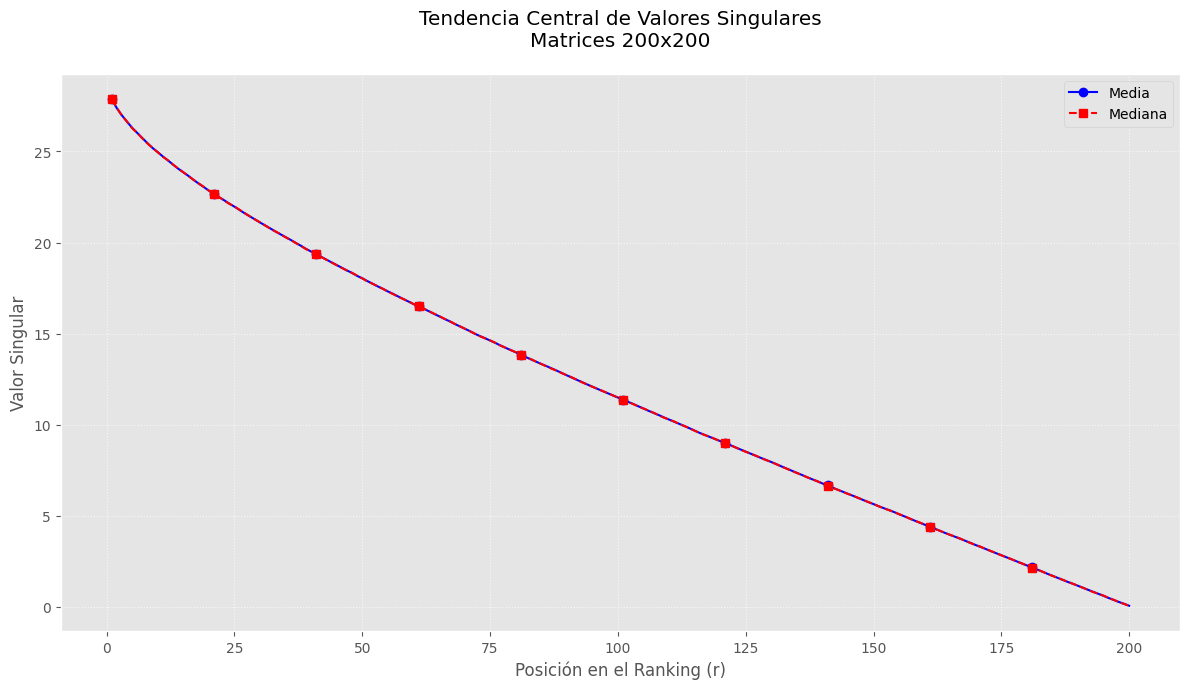

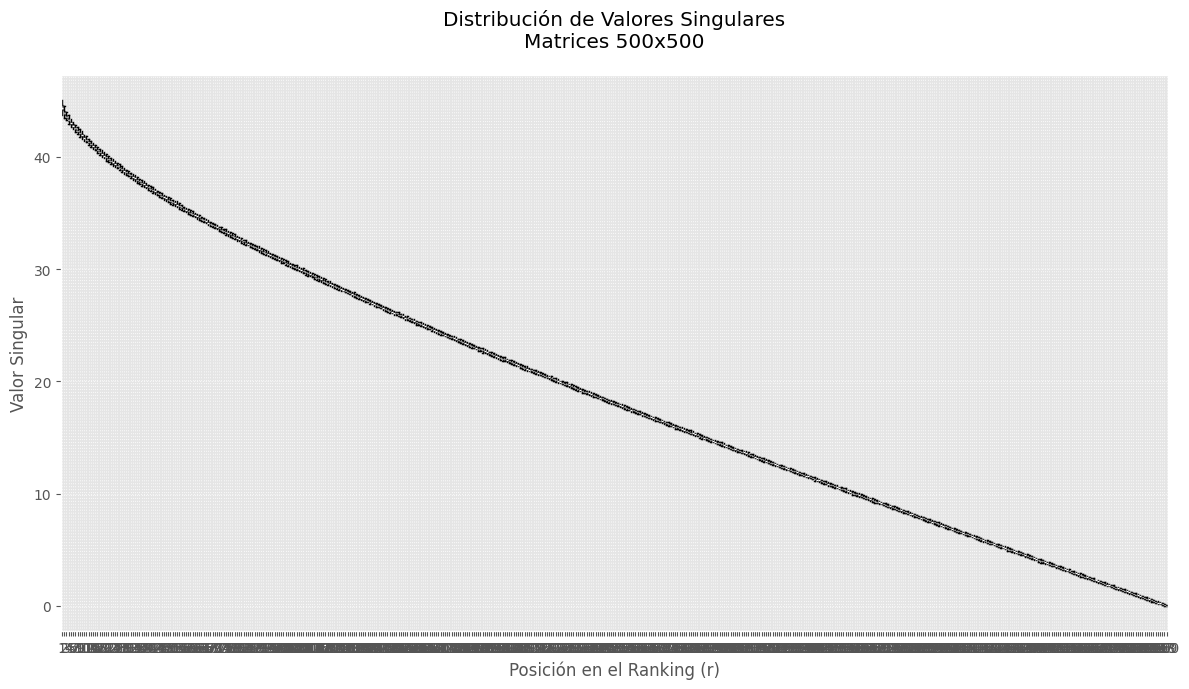

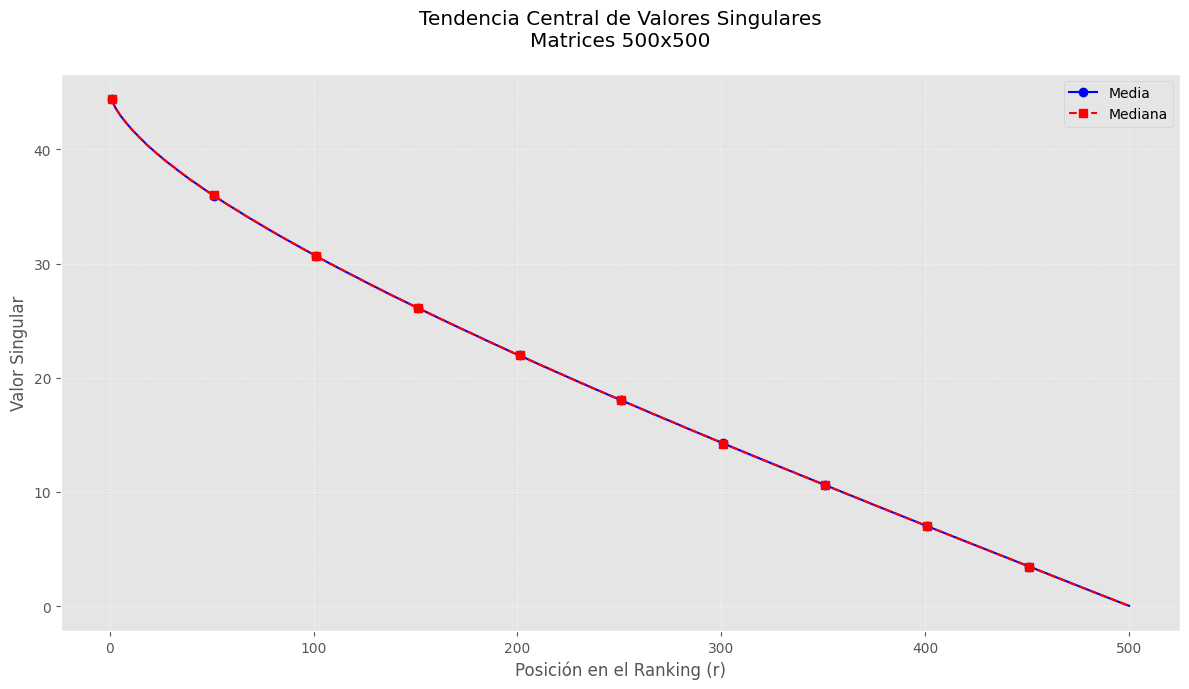

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def simular_valores_singulares(dimension, iteraciones=100):
    resultados = np.empty((iteraciones, dimension))

    for i in range(iteraciones):
        matriz_aleatoria = np.random.normal(size=(dimension, dimension))
        sv = np.linalg.svd(matriz_aleatoria, compute_uv=False)
        resultados[i] = sv

    return resultados

def graficar_resultados(datos_sv, dimension):
    rangos = np.arange(1, dimension + 1)

    # Configuración estética común
    estilo = {
        'color_media': 'blue',
        'color_mediana': 'red',
        'color_boxplot': 'gray',
        'estilo_grid': ':',
        'opacidad': 0.7
    }

    # Figura 1: Diagrama de caja y bigotes
    plt.figure(figsize=(12, 7))
    box = plt.boxplot(
        datos_sv,
        positions=rangos,
        patch_artist=True,
        showfliers=False,
        widths=0.6,
        boxprops=dict(facecolor=estilo['color_boxplot'], alpha=0.6),
        medianprops=dict(color='white')
    )

    plt.title(f'Distribución de Valores Singulares\nMatrices {dimension}x{dimension}', pad=20)
    plt.xlabel('Posición en el Ranking (r)')
    plt.ylabel('Valor Singular')
    plt.grid(True, linestyle=estilo['estilo_grid'], alpha=estilo['opacidad'])
    plt.tight_layout()

    # Figura 2: Tendencia central
    plt.figure(figsize=(12, 7))

    media = np.mean(datos_sv, axis=0)
    mediana = np.median(datos_sv, axis=0)

    plt.plot(rangos, media, label='Media',
            color=estilo['color_media'],
            marker='o', markevery=int(dimension/10))

    plt.plot(rangos, mediana, label='Mediana',
             color=estilo['color_mediana'],
             linestyle='--',
             marker='s', markevery=int(dimension/10))

    plt.title(f'Tendencia Central de Valores Singulares\nMatrices {dimension}x{dimension}', pad=20)
    plt.xlabel('Posición en el Ranking (r)')
    plt.ylabel('Valor Singular')
    plt.legend()
    plt.grid(True, linestyle=estilo['estilo_grid'], alpha=estilo['opacidad'])
    plt.tight_layout()

# Parámetros de simulación
tamanos_matriz = [50, 100, 200, 500]
num_simulaciones = 100

# Ejecutar análisis para cada tamaño
for n in tamanos_matriz:
    valores_sv = simular_valores_singulares(n, num_simulaciones)
    graficar_resultados(valores_sv, n)

plt.show()

3. Compare the singular value distributions for a 1000$\times$1000 uni- formly
distributed random matrix and a Gaussian random matrix of the same
size. Adapt the Gavish–Donoho algorithm to filter uniform noise based on
this singular value distribution. Add uniform noise to a data set (either an
image or the test low-rank signal) and apply this thresholding algorithm to
filter the noise. Vary the magnitude of the noise and compare the results.

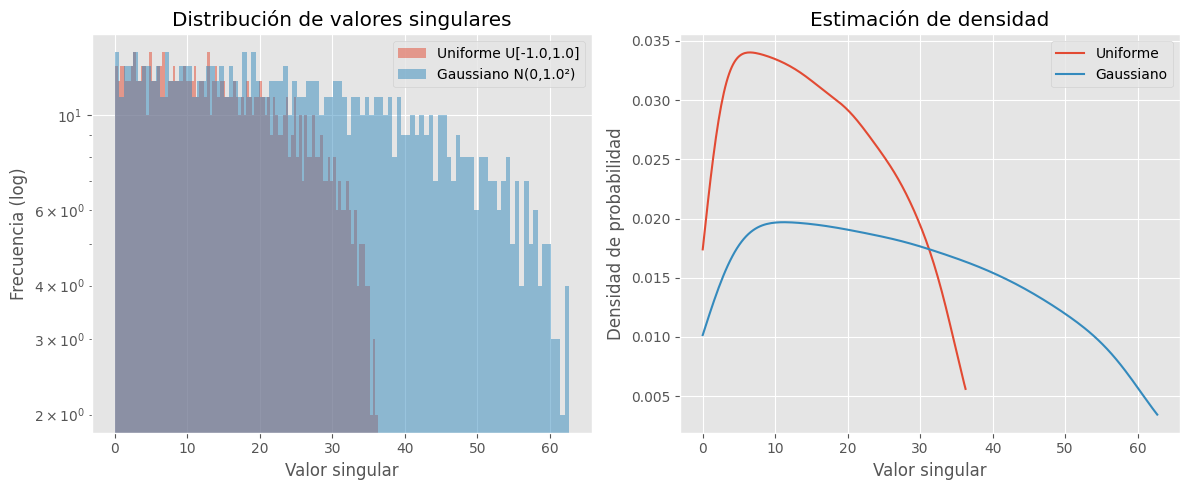

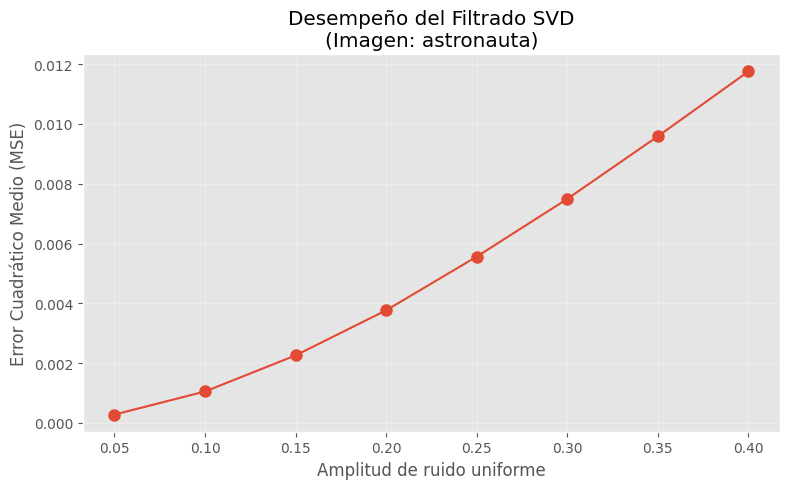

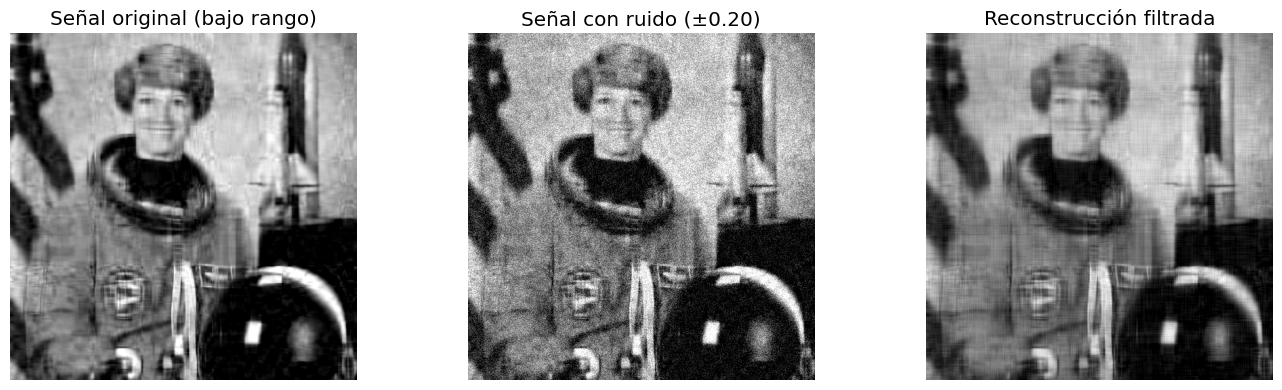

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, color
from numpy.linalg import svd, norm
from scipy.stats import gaussian_kde

def comparar_distribuciones_singulares(n=1000, rango=1, desviacion=1, bins=100):
    # Generación de matrices
    matriz_uniforme = np.random.uniform(-rango, rango, (n, n))
    matriz_gaussiana = np.random.normal(0, desviacion, (n, n))

    # Cálculo de valores singulares
    sv_uniforme = svd(matriz_uniforme, compute_uv=False)
    sv_gauss = svd(matriz_gaussiana, compute_uv=False)

    # Visualización comparativa
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma comparativo
    ax1.hist(sv_uniforme, bins=bins, alpha=0.5,
             label=f'Uniforme U[-{rango:.1f},{rango:.1f}]')
    ax1.hist(sv_gauss, bins=bins, alpha=0.5,
             label=f'Gaussiano N(0,{desviacion:.1f}²)')
    ax1.set_yscale('log')
    ax1.set_xlabel('Valor singular')
    ax1.set_ylabel('Frecuencia (log)')
    ax1.legend()
    ax1.set_title('Distribución de valores singulares')

    # Gráfico de densidad
    for sv, label in zip([sv_uniforme, sv_gauss], ['Uniforme', 'Gaussiano']):
        kde = gaussian_kde(sv)
        x = np.linspace(min(sv), max(sv), 200)
        ax2.plot(x, kde(x), label=label)

    ax2.set_xlabel('Valor singular')
    ax2.set_ylabel('Densidad de probabilidad')
    ax2.legend()
    ax2.set_title('Estimación de densidad')

    plt.tight_layout()
    plt.show()

def calcular_umbral_optimo(filas, columnas, sigma_ruido):
    relacion_aspecto = min(filas, columnas)/max(filas, columnas)
    constante = (4/np.sqrt(3)) if relacion_aspecto > 0.9 else 2.02
    return constante * sigma_ruido * np.sqrt(max(filas, columnas))

def filtrar_por_svd(matriz_ruidosa, umbral):
    U, s, Vt = svd(matriz_ruidosa, full_matrices=False)
    s_filtrados = np.maximum(s - umbral, 0)
    return U @ np.diag(s_filtrados) @ Vt

def evaluar_desempeno_filtro(niveles_ruido, señal_original):
    filas, columnas = señal_original.shape
    errores = []

    for amplitud in niveles_ruido:
        # Generar ruido uniforme y señal ruidosa
        ruido = np.random.uniform(-amplitud, amplitud, (filas, columnas))
        señal_ruidosa = señal_original + ruido

        # Calcular umbral óptimo
        sigma_ruido = amplitud/np.sqrt(3)
        umbral = calcular_umbral_optimo(filas, columnas, sigma_ruido)

        # Aplicar filtrado y calcular error
        señal_filtrada = filtrar_por_svd(señal_ruidosa, umbral)
        mse = norm(señal_filtrada - señal_original, 'fro')**2 / (filas*columnas)
        errores.append(mse)

    # Visualización de resultados
    plt.figure(figsize=(8, 5))
    plt.plot(niveles_ruido, errores, 'o-', markersize=8)
    plt.xlabel('Amplitud de ruido uniforme')
    plt.ylabel('Error Cuadrático Medio (MSE)')
    plt.title('Desempeño del Filtrado SVD\n(Imagen: astronauta)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return errores

if __name__ == '__main__':
    # 1. Análisis comparativo de distribuciones
    comparar_distribuciones_singulares(n=1000, rango=1, desviacion=1)

    # 2. Preparar señal de prueba (astronauta en escala de grises)
    imagen_color = data.astronaut()
    imagen_gris = img_as_float(color.rgb2gray(imagen_color))

    # Reducir a bajo rango (primeros 25 componentes)
    componentes = 25
    U, s, Vt = svd(imagen_gris, full_matrices=False)
    señal_bajo_rango = (U[:, :componentes] * s[:componentes]) @ Vt[:componentes, :]

    # 3. Evaluación del filtro
    niveles = np.linspace(0.05, 0.4, 8)
    mse_resultados = evaluar_desempeno_filtro(niveles, señal_bajo_rango)

    # 4. Ejemplo visual de reconstrucción
    amplitud_ejemplo = niveles[3]
    ruido_ejemplo = np.random.uniform(-amplitud_ejemplo, amplitud_ejemplo, imagen_gris.shape)
    imagen_ruidosa = señal_bajo_rango + ruido_ejemplo

    sigma_ejemplo = amplitud_ejemplo/np.sqrt(3)
    umbral_ejemplo = calcular_umbral_optimo(*imagen_gris.shape, sigma_ejemplo)
    imagen_filtrada = filtrar_por_svd(imagen_ruidosa, umbral_ejemplo)

    # Visualización comparativa
    fig, ejes = plt.subplots(1, 3, figsize=(14, 4))
    titulos = [
        'Señal original (bajo rango)',
        f'Señal con ruido (±{amplitud_ejemplo:.2f})',
        'Reconstrucción filtrada'
    ]

    for ax, img, titulo in zip(ejes, [señal_bajo_rango, imagen_ruidosa, imagen_filtrada], titulos):
        ax.imshow(img, cmap='gray', vmin=0, vmax=1)
        ax.set_title(titulo)
        ax.axis('off')

    plt.tight_layout()
    plt.show()